# Battle of the Cities: Data Visualization
### Goals:

* __bar chart of rent prices by neighborhood for each city__
* ~~__find median rent for 2018 and 2018 per neighborhood per city__~~ only concerned with current prices.
* ~~is rent price above national average? (folium)~~
    * looking at two of the most expensive cities in the country, this may not give much insight
    * overall average? normalize data to see how it deviates from the mean
* is rent prive above city average? (folium)(City_Rank)
    * ex: "This neighorhood is affordable relative to other Manhattan neighborhoods.

* label neighborhoods: Affordable, Average, Expensive within city and within whole dataset
    * ex: General Rank = Expensive, City Rank = Affordable
    * "This neighborhood is expensive relative to both San Francisco and Manhattan but affordable for Manhattan.
* box plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json
import folium
from folium import plugins
import geopandas as gpd

In [4]:
rent_data = pd.read_csv('rent_data_clean.csv', index_col = 0)
rent_data.head(2)

,City,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Upper West Side,New York,4395.0,4300.0,4354.0,4531.0,4632.0,4606.0,4471.0,4288.0,4157.0,...,4166.0,4256.0,4214.0,4148.0,4109.0,4086.0,4071.0,4061.0,4030.0,4053.0
Upper East Side,New York,4606.0,4384.0,4401.0,4622.0,4823.0,4744.0,4546.0,4367.0,4236.0,...,4254.0,4361.0,4341.0,4240.0,4141.0,4038.0,3944.0,3905.0,3899.0,3941.0


Since I'm only concerned with current rent prices, I'll only use the current median rents for September 2019.

In [5]:
rent_data = rent_data[["City", "2019-09"]]
rent_data.rename(columns={"2019-09":"Median_Rent"}, inplace=True)

In [6]:
nyc_data = rent_data[rent_data["City"] == "New York"]
sf_data = rent_data[rent_data["City"] == "San Francisco"]

In [7]:
rent_data.to_csv('rent_data_19.csv')
nyc_data.to_csv('nyc_data.csv')
sf_data.to_csv('sf_data.csv')

## Plots

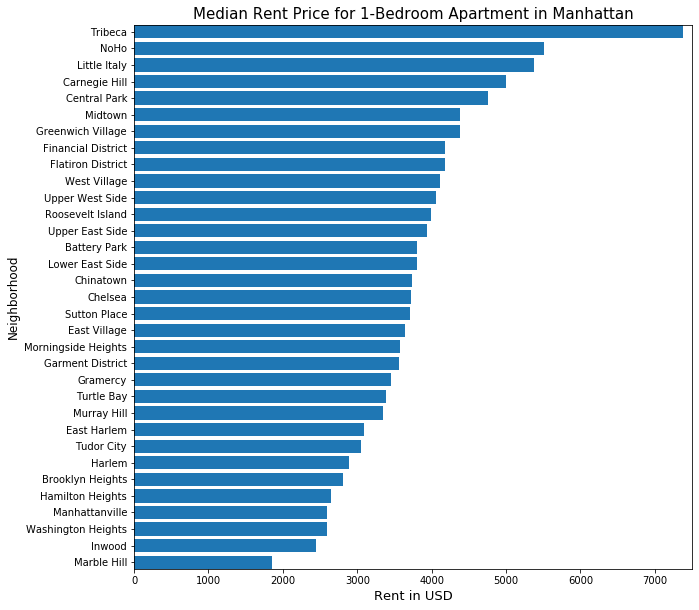

In [8]:
nyc_sort = nyc_data.copy()
nyc_sort.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 10))

plt.barh(nyc_sort.index, nyc_sort.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in Manhattan", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,7500)
plt.ylabel("Neighborhood", size=12)

plt.show()

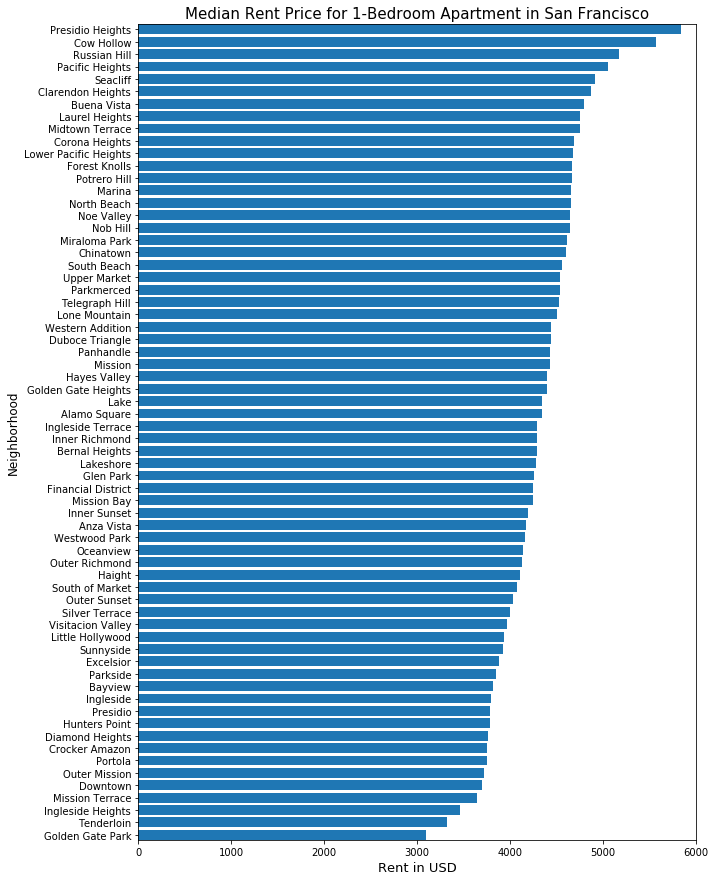

In [9]:
sf_sort = sf_data.copy()
sf_sort.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 15))

plt.barh(sf_sort.index, sf_sort.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in San Francisco", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,6000)
plt.ylabel("Neighborhood", size=12)

plt.show()

## Data Distribution

C:\Users\deand\Anaconda3\envs\default\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\deand\Anaconda3\envs\default\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


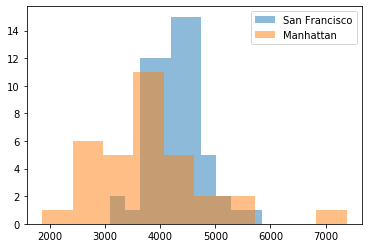

In [10]:
plt.hist(sf_data["Median_Rent"], alpha=0.5, label='San Francisco')
plt.hist(nyc_data["Median_Rent"], alpha=0.5, label='Manhattan')
plt.legend(loc='upper right')
plt.show()

The data distribution is for Manhattan right skewed and normal-ish for San Francisco. Since I know I'll be performing K-Means Clustering, I'll need to normalize my data so that my large-scale data points will not dominate the clustering process. This will also allow me to compare neighborhoods from San Francisco to Manhattan and vice versa. I'll normalize each neighborhood by city and then normalize across both cities using z-scores.

## Normalization

## Maps

In [11]:
sf_geo = gpd.read_file(
    'SF_Find_Neighborhoods.geojson',
    driver='GeoJSON'
)
sf_geo.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,(POLYGON ((-122.4934552679999 37.7835181710000...
1,None,Lake Street,(POLYGON ((-122.4871507149999 37.7837854270000...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,(POLYGON ((-122.4775801709999 37.8109931130000...
3,None,Presidio Terrace,(POLYGON ((-122.4724105299999 37.7873465390000...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,(POLYGON ((-122.4726257899999 37.7863148060000...


In [13]:
hoods = sf_data.index.tolist()

missing = []
for h in hoods:
    if h not in sf_geo.name.to_list():
        missing.append(h)
        
missing

['Ingleside Heights',
 'Haight',
 'Laurel Heights',
 'Lake',
 'Downtown',
 'Ingleside Terrace',
 'Presidio']

In [14]:
map_hoods = sf_geo.name.to_list()
map_hoods.sort()
map_hoods

['Alamo Square',
 'Anza Vista',
 'Apparel City',
 'Aquatic Park / Ft. Mason',
 'Ashbury Heights',
 'Balboa Terrace',
 'Bayview',
 'Bernal Heights',
 'Bret Harte',
 'Buena Vista',
 'Candlestick Point SRA',
 'Castro',
 'Cathedral Hill',
 'Cayuga',
 'Central Waterfront',
 'Chinatown',
 'Civic Center',
 'Clarendon Heights',
 'Cole Valley',
 'Corona Heights',
 'Cow Hollow',
 'Crocker Amazon',
 'Diamond Heights',
 'Dogpatch',
 'Dolores Heights',
 'Downtown / Union Square',
 'Duboce Triangle',
 'Eureka Valley',
 'Excelsior',
 'Fairmount',
 'Financial District',
 'Fishermans Wharf',
 'Forest Hill',
 'Forest Knolls',
 'Glen Park',
 'Golden Gate Heights',
 'Golden Gate Park',
 'Haight Ashbury',
 'Hayes Valley',
 'Holly Park',
 'Hunters Point',
 'India Basin',
 'Ingleside',
 'Ingleside Terraces',
 'Inner Richmond',
 'Inner Sunset',
 'Japantown',
 'Laguna Honda',
 'Lake Street',
 'Lakeshore',
 'Laurel Heights / Jordan Park',
 'Lincoln Park / Ft. Miley',
 'Little Hollywood',
 'Lone Mountain',
 'Low

In [15]:
sf_data.rename({'Ingleside Heights':'Ingleside', 'Haight':'Haight Ashbury',
               'Laurel Heights':'Laurel Heights / Jordan Park', 'Lake':'Lake Street',
               'Downtown':'Downtown / Union Square', 'Ingleside Terrace':'Ingleside Terraces',
               'Presidio':'Presidio National Park'},inplace=True)

sf_data.reset_index()

C:\Users\deand\Anaconda3\envs\default\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [17]:
sf_merged = pd.merge(sf_geo, sf_data, left_on = 'name', right_on = 'Neighborhood', how = 'left')

In [18]:
sf_merged.drop('link', axis=1,inplace=True)

In [19]:
sf_merged.isnull().sum()

name            0
geometry        0
City           50
Median_Rent    52
dtype: int64

In [23]:
state_geo = f'SF_Find_Neighborhoods.geojson'
state_data = sf_merged

m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=sf_merged,
    columns=['name', 'Median_Rent'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    bins=4,
    highlight=True,
    legend_name='Median Rent'
    
).add_to(m)

folium.LayerControl().add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'])
)

m

In [25]:
#bring in data
nyc_geo = gpd.read_file(
    'nyc_neighborhoods.json',
    driver='GeoJSON'
)
nyc_geo.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,MN06,10647077.6122,061,Manhattanville,17040.6865482,Manhattan,1,(POLYGON ((-73.94607828608069 40.8212632160616...
1,MN15,18362149.8311,061,Clinton,34481.629538,Manhattan,1,(POLYGON ((-73.99383108070874 40.7729317878505...
2,MN27,14501867.8828,061,Chinatown,20786.2563855,Manhattan,1,(POLYGON ((-73.9838238729819 40.72147287206689...
3,MN25,19014299.2181,061,Battery Park City-Lower Manhattan,43738.4990004,Manhattan,1,(POLYGON ((-74.00078295209646 40.6942865161671...
4,MN14,15805586.5924,061,Lincoln Square,19869.9086772,Manhattan,1,(POLYGON ((-73.97500111964057 40.7775277799167...


In [ ]:
nyc_geo